In [1]:
import numpy as np
import pickle
from classes.behaviour_analysis import *
from classes.network_2areas import *
from classes.synaptic_mechanism import *
from classes.tasks import *
from classes.plotting_behavior import *
import matplotlib.pyplot as plt
import pickle

In [2]:

dt = 0.1
period = 6000

modelparams = dict(
    seed = 3, #random seed connectivity
    dt = dt, #integration time
    c = 1, # dilution 
    p = 2, # number of patterns
    amp_ff = 0.0015,#.01,#0.6,# strenght of the feedforward weights
    #line attrctor
    N_pfc = 1500,
    g = 0.5,
    dim = 2, #dim line attractor
    sigma_noise_pfc = 0.005,
    tau_noise_pfc = 1,
    epsilon = 0, # decay line attractor
    amp_rpe = .1,
    
    #parameter task
    period = period, # period simulations [ms] 
    t_start = 0.,#start stim
    t_stop = 300, #end stim
    t_go = 3000, #end stim
    T_rpe = 100, #end stim
    thres = 30, #threshold for choice
    tau_reward = 5., #time-scale 10 trials
   
    #beta choice
    beta = 0.1,

    
)

params_ww = dict(
        dt = dt * 1e-3,
        # Wong&Wang model
        A_t = 270., #Hz/nA
        B_t = 108., #Hz
        D_t = 0.154, #s
        tau_nmda = 100 * 1e-3, #s
        gamma = 0.641,
        i_0 = 0.3225 +0.0156, #nA
        i_iti = -0.15, # current ITI
        tau_ampa = 2. * 1e-3, #ms
        sig_ampa = 0.01,#8#nA amplitude noise
        w_a_a = 0.2609,
        w_b_b = 0.2609,
        w_iti = 0.1,
        j_a_b = 0.0497,
        j_b_a = 0.0497,
        
        #stimulation choice
        t_stim = 100,
        period_stim = 50,
        amp = np.array([0, 0]),
        t_max = 300, # max time afte go cue to respond
        period = period # period simulations [ms] 

        
        )

In [3]:
task = foraging_task(modelparams)
la = NetworkDynamics(modelparams, params_ww, task)
la.choice_mechanism = 'recurrent'
u_init = dict(
    pfc0 = 8 * la.la.null[1, :],
    pfc_noise0 = 0 * la.la.null[1, :],
    s0_a = 0,
    s0_b = 0
            )
dynamics = la.dynamics(u_init)


Bait A= 0 |Bait B= 1
reward b 1
Choice= -1
Mean reward A= 0.0 | Mean reward B= 0.2
rpe_a 0 rpe_b 1.0
reaction time 311.19999999808397


Text(0, 0.5, 'Firing rate (Hz)')

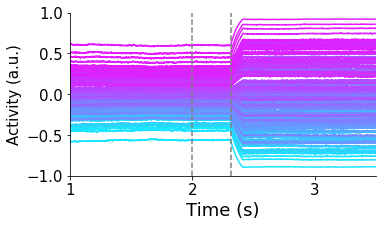

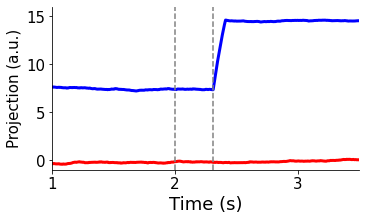

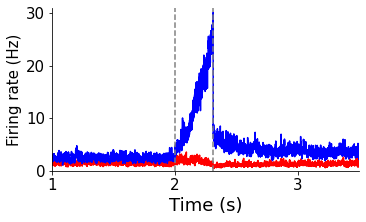

In [4]:
from cycler import cycler
ind_a = np.argsort(la.la.null[1, :])
indexes = [ind_a[i] for i in range(0,modelparams['N_pfc'],10)]
colormap = plt.cm.cool
plt.rc('axes', prop_cycle=(cycler('color', [colormap(i) for i in np.linspace(0.1,0.9,len(indexes))])))
time  = np.arange(0, modelparams['period'], dt)
ind_max = np.argmax(dynamics['rates_ww'][:, 1])
t_max = time[ind_max]


period_max = 4500
period_min = 2000
time  = np.arange(0, modelparams['period'], dt)
fig = plt.figure(figsize=(5.5,3))
ax1 = fig.add_subplot(111)
ax1.plot(time, dynamics['rates_pfc'][:, indexes])
ax1.axvline(x = modelparams['t_go'], ymin =0, ymax = 3, ls = '--', color = 'gray' )
ax1.axvline(x = t_max, ymin =0, ymax = 3, ls = '--', color = 'gray' )
ax1.set_xticks([2000, 3000, 4000])
ax1.set_xticklabels([1, 2, 3])
ax1.tick_params(axis='both', which='major', labelsize=15)
#ax2.tick_params(axis='both', which='minor', labelsize=8)
ax1.set_xlabel('Time (s)', fontsize = 18)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
#ax1.spines['bottom'].set_visible(False)
ax1.set_xlim([period_min,period_max])
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_ylim([-1,1])
ax1.set_ylabel('Activity (a.u.)', fontsize=15)
#plt.savefig('figures/fig_ww_pfc_overlap1.pdf', bbox_inches='tight', transparent=True)


fig = plt.figure(figsize=(5.5,3))
ax2 = fig.add_subplot(111)
ax2.plot(time, dynamics['overlaps_pfc'][:, 0], color = 'r', lw = 3)
ax2.plot(time, dynamics['overlaps_pfc'][:, 1], color = 'b', lw = 3)
ax2.axvline(x = modelparams['t_go'], ymin =0, ymax = 3, ls = '--', color = 'gray' )
ax2.axvline(x = t_max, ymin =0, ymax = 3, ls = '--', color = 'gray' )
ax2.set_xticks([2000, 3000, 4000])
ax2.set_xticklabels([1, 2, 3])
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
#ax2.spines['bottom'].set_visible(False)
ax2.set_xlim([period_min,period_max])
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.set_ylim([-1,16])
ax2.set_ylabel('Projection (a.u.)', fontsize=15)
ax2.set_xlabel('Time (s)', fontsize = 18)
#plt.savefig('figures/fig_ww_pfc_overlap2.pdf', bbox_inches='tight', transparent = True)

fig = plt.figure(figsize=(5.5,3))
ax3 = fig.add_subplot(111)
ax3.plot(time, dynamics['rates_ww'][:, 0], color = 'r')
ax3.plot(time, dynamics['rates_ww'][:, 1], color = 'b')
ax3.axvline(x = modelparams['t_go'], ymin =0, ymax = 3, ls = '--', color = 'gray' )
ax3.axvline(x = t_max, ymin =0, ymax = 3, ls = '--', color = 'gray' )
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_xlim([period_min, period_max])
ax3.set_ylim([0,31])
ax3.set_xticks([2000, 3000, 4000])
ax3.set_xticklabels([1, 2, 3])
ax3.tick_params(axis='both', which='major', labelsize=15)
#ax2.tick_params(axis='both', which='minor', labelsize=8)
ax3.set_xlabel('Time (s)', fontsize = 18)
ax3.set_ylabel('Firing rate (Hz)', fontsize=15)
#plt.savefig('figures/fig_ww_pfc_overlap3.pdf', bbox_inches='tight', transparent = True)

In [65]:
params_syn = dict(
        seed = 1,
        dt = dt,

        w1 = 0.45,
        w2 = 0.75,
        sigma = 0.05,
        i0 = np.array([0.1, 0.1]),
        std_priv = .003, # amplitude private noise
        amp_ff = 0.04, # amplitude feedforward
        amp_feedback = .2, # strenght of the feedback weights
        amp_learning = -.1, # strenght of the feedback weights


        #learning rule
        wmax = 1.,
        qp = 1,
        qm = 1,
     

        #stimulation
        t_stim = 100,
        period_stim = 50,
        amp = np.array([0, 0]),




        #parameter task
        period = period, # period simulations [ms] 
        t_start = 0.,#start stim
        t_stop = 300, #end stim
        t_go = 3000, #end stim
        T_rpe = 100, #end stim
        thres = 30, #threshold for choice
        tau_reward = 5., #time-scale 10 trials
   
        #beta choice
        beta = 0.5,
        N = 2,  # number of neurons
        N_th = 2,  # number of neurons
        N_pfc = 2,
        amp_rpe = 0

        )


In [66]:
task = foraging_task(params_syn)
syn = NetworkDynamicsSynaptic(params_syn, params_ww, task)
syn.choice_mechanism = 'recurrent'
syn.task.rpe_a=-.3
syn.task.rpe_b=-.3

u_init = dict(
    pfc0 = syn.syn.fixed_points(),
    pfc_noise0 = np.array([0, 0]),
    s0_a = 0,
    s0_b = 0
            )
dynamics_syn = syn.dynamics(u_init)
print(syn.syn.wa, syn.syn.wb)


Bait A= 0 |Bait B= 0
reward b 0
Choice= -1
Mean reward A= 0.0 | Mean reward B= 0
0.45 0.75


Text(0, 0.5, 'Firing rate (Hz)')

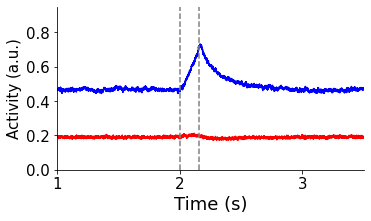

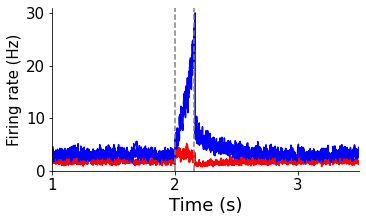

In [67]:

period_max = 4500
period_min = 2000
time  = np.arange(0, params_syn['period'], dt)
r_max = np.amax(dynamics_syn['rates_ww'][100:-1, 1])
ind_r_max = np.where(dynamics_syn['rates_ww'][100:-1, 1] == r_max)[0][0]
t_r_max = time[ind_r_max]

fig = plt.figure(figsize=(5.5,3))
ax1 = fig.add_subplot(111)
ax1.plot(time, dynamics_syn['rates_pfc'][:,0], color='r')
ax1.plot(time, dynamics_syn['rates_pfc'][:, 1], color='b')
ax1.axvline(x = params_syn['t_go'], ymin =0, ymax = 3, ls = '--', color = 'gray' )
ax1.axvline(x = t_r_max, ymin =0, ymax = 3, ls = '--', color = 'gray' )
ax1.set_ylim([0,31])
ax1.set_xticks([2000, 3000, 4000])
ax1.set_xticklabels([1, 2, 3])
ax1.set_xlabel('Time (s)', fontsize = 18)
ax1.set_ylabel('Firing rate (Hz)', fontsize=15)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
#ax1.spines['bottom'].set_visible(False)
ax1.set_xlim([period_min,period_max])
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_ylim([0,.95])
ax1.set_ylabel('Activity (a.u.)', fontsize=15)
#plt.savefig('figures/synaptic_dynamics1.pdf', bbox_inches='tight')
#ax1.set_title('mPFC', fontsize=15)

fig = plt.figure(figsize=(5.5,3))
ax2 = fig.add_subplot(111)
ax2.plot(time, dynamics_syn['rates_ww'][:,0], color='r')
ax2.plot(time, dynamics_syn['rates_ww'][:, 1], color='b')
ax2.axvline(x = params_syn['t_go'], ymin =0, ymax = 3, ls = '--', color = 'gray' )
ax2.axvline(x = t_r_max, ymin =0, ymax = 3, ls = '--', color = 'gray' )
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_xlim([period_min, period_max])
ax2.set_ylim([0,31])
ax2.set_xticks([2000, 3000, 4000])
ax2.set_xticklabels([1, 2, 3])
ax2.tick_params(axis='both', which='major', labelsize=15)
#ax2.tick_params(axis='both', which='minor', labelsize=8)
ax2.set_xlabel('Time (s)', fontsize = 18)
ax2.set_ylabel('Firing rate (Hz)', fontsize=15)
#plt.savefig('figures/synaptic_dynamics2.pdf', bbox_inches='tight')

In [54]:


params_syn['t_stim'] = 2250
params_syn['period_stim'] = 500
params_syn['amp'] = np.array([0, -0.05])
task = foraging_task(params_syn)
syn = NetworkDynamicsSynaptic(params_syn, params_ww, task)
syn.choice_mechanism = 'recurrent'
u_init = dict(
    pfc0 = syn.syn.fixed_points(),
    pfc_noise0 = np.array([0, 0]),
    s0_a = 0,
    s0_b = 0
            )
dynamics_syn = syn.dynamics(u_init)

Bait A= 0 |Bait B= 0
reward b 0
Choice= -1
Mean reward A= 0.0 | Mean reward B= 0


Text(0, 0.5, 'Firing rate (Hz)')

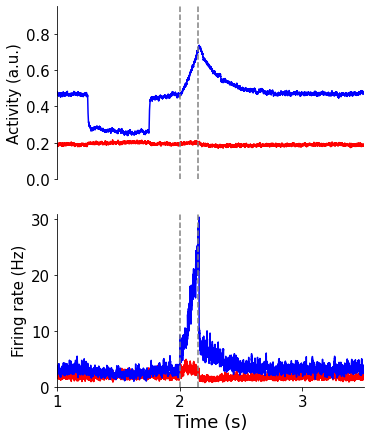

In [55]:

period_max = 4500
period_min = 2000
time  = np.arange(0, params_syn['period'], dt)
r_max = np.amax(dynamics_syn['rates_ww'][100:-1, 1])
ind_r_max = np.where(dynamics_syn['rates_ww'][100:-1, 1] == r_max)[0][0]
t_r_max = time[ind_r_max]

fig = plt.figure(figsize=(5.5,7))
ax1 = fig.add_subplot(211)
ax1.plot(time, dynamics_syn['rates_pfc'][:,0], color='r')
ax1.plot(time, dynamics_syn['rates_pfc'][:, 1], color='b')
ax1.axvline(x = params_syn['t_go'], ymin =0, ymax = 3, ls = '--', color = 'gray' )
ax1.axvline(x = t_r_max, ymin =0, ymax = 3, ls = '--', color = 'gray' )
ax1.set_ylim([0,31])
ax1.set_xlim([2000, 4000])
ax1.set_xticks([])
#ax1.set_xticklabels([1, 2, 3])
#ax1.set_xlabel('Time (s)', fontsize = 18)
ax1.set_ylabel('Firing rate (Hz)', fontsize=15)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_xlim([period_min,period_max])
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_ylim([0,.95])
ax1.set_ylabel('Activity (a.u.)', fontsize=15)
#plt.savefig('figures/synaptic_dynamics1.pdf', bbox_inches='tight')
#ax1.set_title('mPFC', fontsize=15)

#fig = plt.figure(figsize=(5.5,3))
ax2 = fig.add_subplot(212)
ax2.plot(time, dynamics_syn['rates_ww'][:,0], color='r')
ax2.plot(time, dynamics_syn['rates_ww'][:, 1], color='b')
ax2.axvline(x = params_syn['t_go'], ymin =0, ymax = 3, ls = '--', color = 'gray' )
ax2.axvline(x = t_r_max, ymin =0, ymax = 3, ls = '--', color = 'gray' )
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_xlim([period_min, period_max])
ax2.set_ylim([0,31])
ax2.set_xticks([2000, 3000, 4000])
ax2.set_xticklabels([1, 2, 3])
ax2.tick_params(axis='both', which='major', labelsize=15)
#ax2.tick_params(axis='both', which='minor', labelsize=8)
ax2.set_xlabel('Time (s)', fontsize = 18)
ax2.set_ylabel('Firing rate (Hz)', fontsize=15)
#plt.savefig('figures/synaptic_dynamics2.pdf', bbox_inches='tight')
#plt.savefig('figures/inactivation1.pdf', bbox_inches='tight')

In [68]:


params_syn['amp'] = np.array([0, 0])
params_syn['amp_feedback'] = 0
#params_ww['t_stim'] = params_syn['t_go']
#params_ww['period_stim'] = 300
#params_ww['amp'] = np.array([-0.1, -.1])
task = foraging_task(params_syn)
syn = NetworkDynamicsSynaptic(params_syn, params_ww, task)
syn.choice_mechanism = 'recurrent'
u_init = dict(
    pfc0 = syn.syn.fixed_points(),
    pfc_noise0 = np.array([0, 0]),
    s0_a = 0,
    s0_b = 0
            )
dynamics_syn = syn.dynamics(u_init)

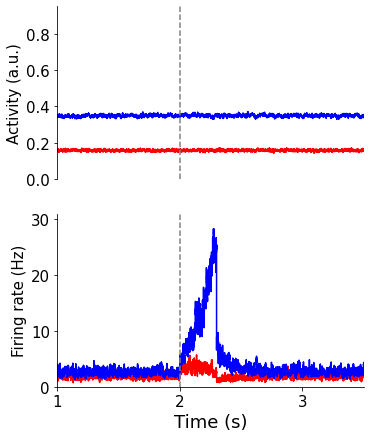

In [70]:

period_max = 4500
period_min = 2000
time  = np.arange(0, params_syn['period'], dt)
r_max = np.amax(dynamics_syn['rates_ww'][100:-1, 1])
ind_r_max = np.where(dynamics_syn['rates_ww'][100:-1, 1] == r_max)[0][0]
t_r_max = time[ind_r_max]

fig = plt.figure(figsize=(5.5,7))
ax1 = fig.add_subplot(211)
ax1.plot(time, dynamics_syn['rates_pfc'][:,0], color='r')
ax1.plot(time, dynamics_syn['rates_pfc'][:, 1], color='b')
ax1.axvline(x = params_syn['t_go'], ymin =0, ymax = 3, ls = '--', color = 'gray' )
#ax1.axvline(x = t_r_max, ymin =0, ymax = 3, ls = '--', color = 'gray' )
ax1.set_ylim([0,31])
ax1.set_xlim([2000, 4000])
ax1.set_xticks([])
#ax1.set_xticklabels([1, 2, 3])
#ax1.set_xlabel('Time (s)', fontsize = 18)
ax1.set_ylabel('Firing rate (Hz)', fontsize=15)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_xlim([period_min,period_max])
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_ylim([0,.95])
ax1.set_ylabel('Activity (a.u.)', fontsize=15)
#plt.savefig('figures/synaptic_dynamics1.pdf', bbox_inches='tight')
#ax1.set_title('mPFC', fontsize=15)

#fig = plt.figure(figsize=(5.5,3))
ax2 = fig.add_subplot(212)
ax2.plot(time, dynamics_syn['rates_ww'][:,0], color='r')
ax2.plot(time, dynamics_syn['rates_ww'][:, 1], color='b')
ax2.axvline(x = params_syn['t_go'], ymin =0, ymax = 3, ls = '--', color = 'gray' )
#ax2.axvline(x = t_r_max, ymin =0, ymax = 3, ls = '--', color = 'gray' )
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_xlim([period_min, period_max])
ax2.set_ylim([0,31])
ax2.set_xticks([2000, 3000, 4000])
ax2.set_xticklabels([1, 2, 3])
ax2.tick_params(axis='both', which='major', labelsize=15)
#ax2.tick_params(axis='both', which='minor', labelsize=8)
ax2.set_xlabel('Time (s)', fontsize = 18)
ax2.set_ylabel('Firing rate (Hz)', fontsize=15)
plt.savefig('figures/inactivation2.pdf', bbox_inches='tight')